# **Face Recognition using Eigenfaces**
---




####We will be using [FEI Face Database](https://fei.edu.br/~cet/facedatabase.html)  for our face recognition purpose. 
*Datasets consist of faces of 200 people and each person has two frontal images (one with a neutral expression and the other with a smiling facial expression), there are 400 full frontal face images manually registered and cropped.*
<br><br>**We will use normalized, equalized and cropped frontal face images.**


Add dataset in your Colab using:


```
!wget <link> 
```



Unzip your zip files using:
```
!unzip <name_of_your_zip_file>
```

In [2]:
# importing all the necessary packages 
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image

###Vectorization
We will use Python Imaging Library (PIL) to load images from files.
`PIL.Image.open()` Opens and identifies the given image file.`Note` Open into greyscale, or L(Luminance) mode: 

```
img = Image.open(f'{i}a.jpg').convert('L')  # i ranges from 1 to 200
img = img.resize((width, height),Image.ANTIALIAS) # for speed
```
Rearrange each Face image N x N into a column vector N<sup>2</sup> x 1. After Vectorization the shape of face matrix should be 200 x (width x height)





In [3]:
image_array = []

In [4]:
vec = []

In [5]:
for i in range(1,201): 
    img = Image.open(f'frontalimages_manuallyaligned_part1/{i}a.jpg').convert('L')  # i ranges from 1 to 200
    width, height = 50, 50
    img = img.resize((width, height),Image.ANTIALIAS) # for speed 
    image_array = np.array(img)
    
    vec.append(image_array.flatten())

In [6]:
# Check face_matrix.shape 
vec = np.array(vec)
vec.shape

(200, 2500)

In [7]:
# Find mean_face
mean_face = np.mean(vec, axis=0)

Text(0.5, 1.0, 'Mean Face')

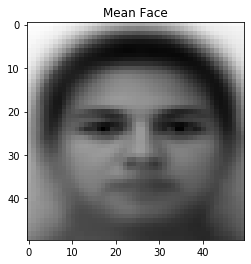

In [8]:
plt.imshow(mean_face.reshape(height,width),cmap='gray'); 
plt.title('Mean Face')



```
plt.imshow(mean_face.reshape(height,width),cmap='gray'); 
plt.title('Mean Face')
```

### Normalization


In [9]:
len(vec)

200

In [10]:
#Perfrom Normalization
normalized_vec = []
for i in range(len(vec)):
    normalized_vec.append(vec[i] - mean_face)

In [11]:
normalized_vec = np.array(normalized_vec)

In [12]:
# Calculate covariance matrix
#np.cov expects features as rows and observations as columns, so transpose
C = np.cov(normalized_vec.transpose())

In [13]:
C.shape

(2500, 2500)

In [14]:
#Find Eigen Vectors and Eigen Values, you can use SVD from np.linalg.svd
u, s, vh = np.linalg.svd(C)

In [15]:
u.shape

(2500, 2500)

In [16]:
vh.shape

(2500, 2500)

In [17]:
s.shape

(2500,)

In [18]:
eigen_value, eigen_vector = s, u


Plot the first 10 Eigenfaces
```
fig, axs = plt.subplots(1,3,figsize=(15,5))
for i in np.arange(10):
    ax = plt.subplot(2,5,i+1)
    img = <eigen_vectors>[:,i].reshape(height,width)
    plt.imshow(img, cmap='gray')
fig.suptitle("First 10 Eigenfaces", fontsize=16)
```



In [19]:
eigen_vector[0]

array([-0.00778834, -0.00469477, -0.00848012, ..., -0.00694697,
       -0.30242688, -0.0098952 ])

#### Seeing the 10 eigen faces


Text(0.5, 0.98, 'First 10 training imaes')

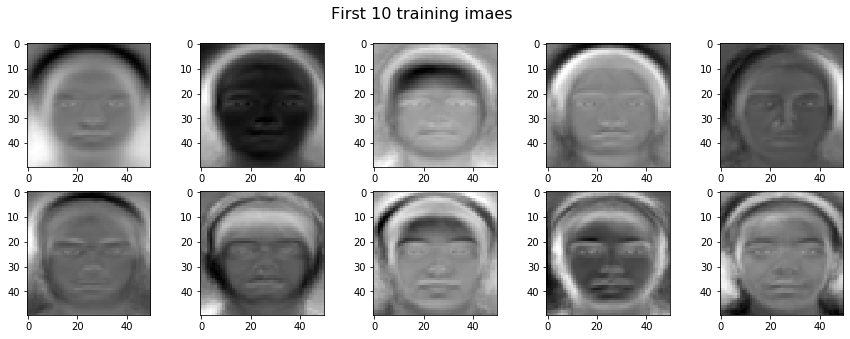

In [21]:
#Plot the first 10 Eigenfaces
fig, axs = plt.subplots(1,3,figsize=(15,5))
for i in np.arange(10):
    ax = plt.subplot(2,5,i+1)
    img = eigen_vector[:,i].reshape(height,width)
    plt.imshow(img, cmap='gray')
fig.suptitle("First 10 training imaes", fontsize=16)


#### Seeing the normal 10 faces

Text(0.5, 0.98, 'First 10 Eigenfaces')

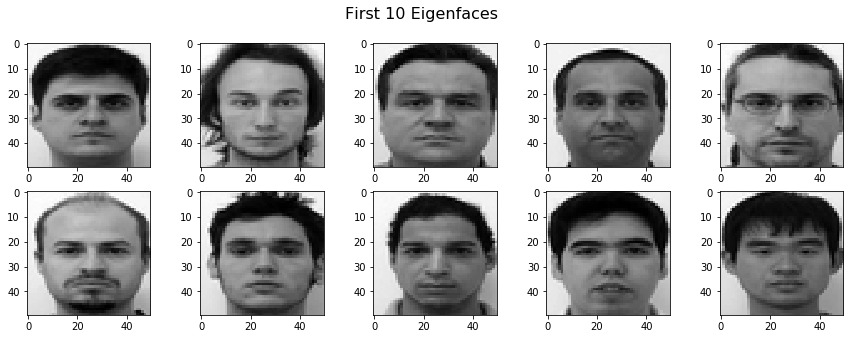

In [61]:
# Seeing the normal 10 images from the training set
#Plot the first 10 Eigenfaces
fig, axs = plt.subplots(1,3,figsize=(15,5))
for i in np.arange(10):
    ax = plt.subplot(2,5,i+1)
    img = vec[i,:].reshape(height,width)
    plt.imshow(img, cmap='gray')
fig.suptitle("First 10 Eigenfaces", fontsize=16)


Reconstruction with increasing Eigenfaces
```
fig, axs = plt.subplots(2,5,figsize=(15,6))
for k, i in zip([0,1,9,19,39,79,159,199,399,799],np.arange(10)):
    # Reconstruct the first picture '1a.jpg' whose index is 0.
    # Get PC scores of the images (wights)
    # Reconstruct first face in dataset using k PCs (projected_face)
    ax = plt.subplot(2,5,i+1)
    ax.set_title("k = "+str(k+1))
    plt.imshow(projected_face.reshape(height,width)+mean_face.reshape(height,width),cmap='gray');
```



Text(0.5, 1.0, 'First Image')

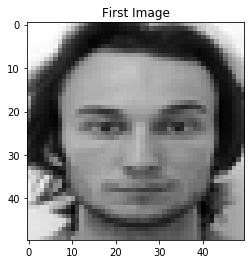

In [29]:
# Second image in data set looks like
plt.imshow(vec[1].reshape(height,width),cmap='gray'); 
plt.title('First Image')

Text(0.5, 0.98, 'Reconstruction with Increasing Eigenfaces')

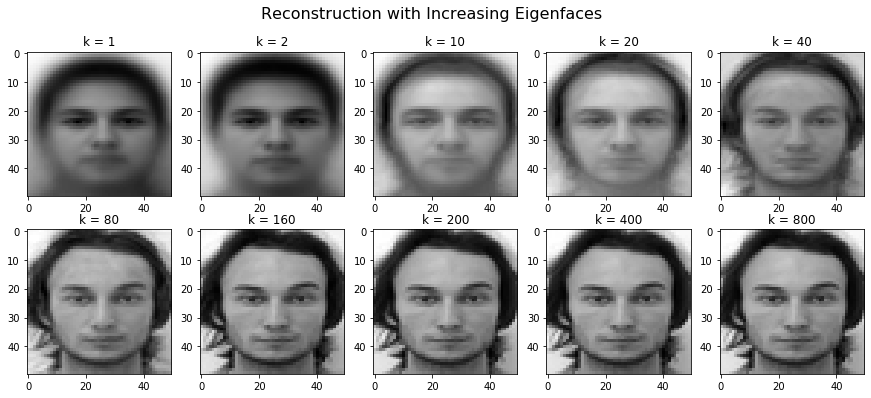

In [31]:
# Reconstruct with increasing Eigenfaces
fig, axs = plt.subplots(2,5,figsize=(15,6))
for k, i in zip([0,1,9,19,39,79,159,199,399,799],np.arange(10)):
    # Reconstruct the first picture '2a.jpg' whose index is 1.
    weight = normalized_vec[1,:].dot(eigen_vector[:,:k]) # Get PC scores of the images
    projected_face = weight.dot(eigen_vector[:,:k].T) # Reconstruct first face in dataset using k PCs
    ax = plt.subplot(2,5,i+1)
    ax.set_title("k = "+str(k+1))
    plt.imshow(projected_face.reshape(50,50)+mean_face.reshape(50,50),cmap='gray');
fig.suptitle(("Reconstruction with Increasing Eigenfaces"), fontsize=16)

Text(0.5, 1.0, 'First Face')

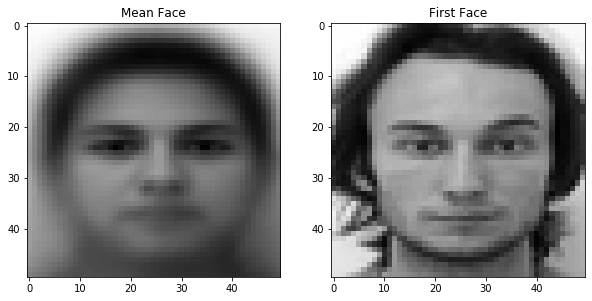

In [33]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(mean_face.reshape(height,width),cmap='gray'); 
plt.title('Mean Face')
plt.subplot(1,2,2)
# first image in data set looks like
plt.imshow(vec[1].reshape(height,width),cmap='gray'); 
plt.title('First Face')